# CS541 Assignment4 
Student Name: Chenxu Wang  
CWID: 10457625  
E-mail: cwang101@stevens.edu  

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import math

# 1.Data Set

In [56]:
data = pd.read_csv('ratings.csv', usecols=[0, 1, 2])

In [57]:
data

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [60]:
data1= data.drop_duplicates(subset=["userId"], keep='first', inplace=False)
print(data1.shape)

(610, 3)


In [61]:
data2= data.drop_duplicates(subset=["movieId"], keep='first', inplace=False)
print(data2.shape)

(9724, 3)


In [62]:
#p = max(data["movieId"])
#print(p)
#row_list = data[data.movieId ==47].index.tolist()
#print(row_list)

Suppose there are n users and p movies. Then the shape of the rating matrix M is nxp. 

In [63]:
# The number of users
n = 610
# The number of movies
p = 9724
M = np.zeros((n,p))

In [64]:
# Put movies into a Set for getting the index.
movieId = data["movieId"].tolist()
list_of_movie = list(set(movieId))
#print(len(num_of_moive))

In [65]:
# Generate matrix M
for i in range(len(data)):
    row = int(data.loc[i]["userId"]) - 1
    movieId = int(data.loc[i]["movieId"])
    col = list_of_movie.index(movieId)
    rating_value = int(data.loc[i]["rating"])
    M[row][col] = rating_value

In [66]:
M.shape

(610, 9724)

In [67]:
# Denote the index set of observed entries by Omega

In [68]:
d1 = data['userId'].map(lambda x: x-1)
d2 = data['movieId'].map(lambda x: list_of_movie.index(x))
frames = [d1, d2]
Omega = pd.concat(frames, axis=1)
Omega.columns = ['Row', 'Col']


In [69]:
Omega

,Row,Col
0,0,0
1,0,2
2,0,5
3,0,46
4,0,49
...,...,...
100831,609,2291
100832,609,3714
100833,609,3716
100834,609,3718


In [70]:
# Divide Omega into Omega1 and Omega2
# Omega1 is as training
# Omega2 is as testing
from sklearn.model_selection import train_test_split
Omega1, Omega2 = train_test_split(Omega, test_size=0.1, random_state=0)

In [71]:
Omega1

,Row,Col
17701,110,8978
24098,166,988
2637,18,1687
97861,605,2712
43497,291,107
...,...,...
21243,139,1204
45891,303,1434
42613,287,2154
43567,291,1129


In [72]:
Omega2

,Row,Col
41008,275,688
94274,598,5852
77380,482,1134
29744,201,2928
40462,273,8922
...,...,...
61893,409,1028
88126,566,7848
29734,201,2856
63133,413,2070


# 2. Learning

In [73]:
def predict(Ui, Vi):
    return np.dot(Ui.T, Vi)

We have to derive the gradient F(U, V) respect to  U and V. Then, using gradient Descent to iterate U, V.  
Gradient(Ui) = -(Mij - Ui.T*Vj)Vj + lambdaUi  
Gradient(Vi) = -(Mij - Ui.T*Vj)Ui + lambdaVj  
(Calculation of Gradients written in CS541_a4_2.1.pdf)  
u = u - lr*gradient(u)  
v = v - lr*gradient(v)  

In [76]:
# Define a function to implement Gradient Descent
def GD(Omega1, lam, lr, epoch, U_init, V_init):
    F_list = []
    U = U_init.copy()
    V = V_init.copy()
    for e in range(epoch):
        F = 0
        for index, row in Omega1.iterrows():
            i = row['Row']
            j = row['Col']
            error = M[i][j] - predict(U[:, i], V[:, j])
            U[:, i] += lr * (error * V[:, j] - lam*U[:, i])
            
            V[:, j] += lr * (error * U[:, i] - lam*V[:, j])
            F += error**2
        F = 0.5*F + 0.5*lam*(LA.norm(U, 'fro')**2 + LA.norm(V, 'fro')**2)
        F_list.append(F)
        print(F)
    return F_list, U, V

In [77]:
r = 10
# initialize U and V
U = np.random.random((r, n))
V = np.random.random((r, p))

In [78]:
lam = 1
learning_rate = 0.1
epoch = 50
F_list, U_lam_1, V_lam_1 = GD(Omega1, lam, learning_rate, epoch, U, V)

104004.97907002251
99670.90039315073
98622.17786023435
98091.22072129206
97783.51168976336
97588.39867916648
97455.8415755759
97360.8547352749
97289.9874782766
97235.50314477462
97192.67543405145
97158.45592907569
97130.7818738135
97108.1985653379
97089.64374630667
97074.31912533348
97061.61068759995
97051.03736435586
97042.21676507573
97034.84151642109
97028.66240675678
97023.47603580133
97019.11553979006
97015.44347964911
97012.34629341497
97009.72990862497
97007.51623391066
97005.64032936652
97004.04810888536
97002.69446463225
97001.54172965954
97000.55841361525
96999.71816025826
96998.99888607014
96998.38206725572
96997.85214873089
96997.39605360743
96997.00277567588
96996.66304049816
96996.36902332633
96996.11411411286
96995.89272161435
96995.70010993001
96995.53226201984
96995.38576564903
96995.25771797862
96995.14564571998
96995.04743821143
96994.96129131893
96994.88566031856


/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


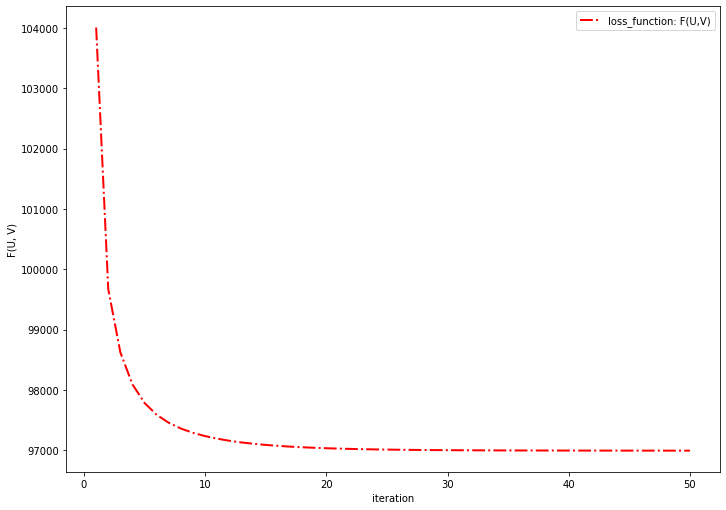

In [79]:
# Plot the objective value against the number of iterations.
fig = plt.figure(figsize=(10, 7))
plt.plot(list(range(1,50+1)), F_list, '-.r', LineWidth=2,label='loss_function: F(U,V)')


plt.legend()
plt.tight_layout()
plt.xlabel("iteration")
plt.ylabel('F(U, V)')
plt.show()

 As the plot showing up, it can converaged with the increasing iteration.  
 It can converage after 10 iteraions.  

# 3. Evaluation

In [80]:
# To get the prediction Matrix X
X_lam_1 = predict(U_lam_1, V_lam_1)

In [81]:
X_lam_1.shape

(610, 9724)

In [82]:
# Define a function to calculate the RMSE
def RMSE_func(X_predict, Omega2):
    rmse = 0
    for index, row in Omega1.iterrows():
        i = row['Row']
        j = row['Col']
        error = (M[i, j] - X_predict[i, j])**2
        rmse += error
    rmse = math.sqrt(rmse/len(Omega2))
    return rmse

In [83]:
# Record the RMSE for the choice lambda= 1.
rmse_lam_1 = RMSE_func(X_lam_1, Omega2)

In [84]:
print(rmse_lam_1)

3.9771602004217375


In [85]:
# Test different lambda
lam_list = [1e-6, 1e-3, 0.1, 0.5, 2, 5, 10, 20, 50, 100, 500, 1000]

In [86]:
# Define a funciton to calcuate RMSE for the models with different lambda
def RMSE_dif_lam(lam, U_init, V_init):
    #RMSE_list = []
    epoch = 10
    #for i in range(len(lam_list)):
    F_list, U_lam_i, V_lam_i = GD(Omega1, lam, learning_rate, epoch, U_init, V_init)
    X_lam_i = predict(U_lam_i, V_lam_i)
    rmse_lam_i = RMSE_func(X_lam_i, Omega2)
    #RMSE_list.append(rmse_lam_i)
    print(rmse_lam_i)
    return rmse_lam_i

In [46]:
rmse_lam_0_1 = RMSE_dif_lam(0.1, U, V)

60751.23311177922


/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in multiply
  del sys.path[0]


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [87]:
rmse_lam_0_5 = RMSE_dif_lam(0.5, U, V)

70917.94477146718
65000.813252387634
63911.23986083391
63407.26241147322
63124.95645873231
62947.473028905595
62826.120645310904
62737.24457546932
62668.25635064822
62612.04505059151
3.185759434862598


In [88]:
rmse_lam_2 = RMSE_dif_lam(2, U, V)

220896.92248242264
227795.9842747057
227806.50941305832
227667.88680501273
227571.67611893566
227515.4954807914
227484.1355928072
227466.94678695846
227457.6625407925
227452.75414206745
6.407390476234995


In [89]:
rmse_lam_5 = RMSE_dif_lam(5, U, V)

545535.5719421258
568591.4545954464
567549.2175074056
566986.583629534
566735.8217337985
566623.9552051217
566572.6482486464
566548.3216285319
566536.4017015389
566530.380948047
10.574522883914927


In [90]:
rmse_lam_10 = RMSE_dif_lam(10, U, V)

562778.85345563
569257.9430348647
569244.8685396116
569244.1331055755
569244.0891278589
569244.086388132
569244.0862151851
569244.0862042502
569244.0862035603
569244.0862035163
10.574559143103961


In [48]:
rmse_lam_20 = RMSE_dif_lam(20, U, V)

/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in multiply
  del sys.path[0]
/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]
/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in add
  # This is added back by InteractiveShellApp.init_path()


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [91]:
lambda_list = [0.5, 1, 2, 5, 10]
rmse_list = [rmse_lam_0_5, rmse_lam_1, rmse_lam_2, rmse_lam_5, rmse_lam_10]

/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


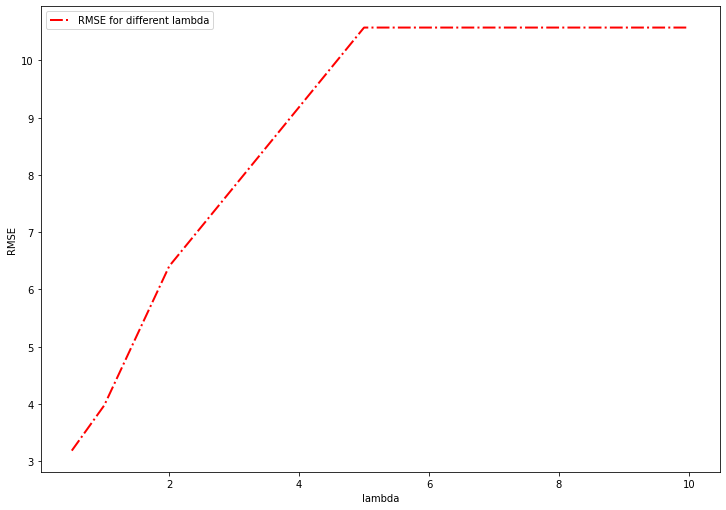

In [92]:
fig = plt.figure(figsize=(10, 7))
plt.plot(lambda_list, rmse_list, '-.r', LineWidth=2,label='RMSE for different lambda')


plt.legend()
plt.tight_layout()
plt.xlabel("lambda")
plt.ylabel('RMSE')
plt.show()

When lambda is less than 0.5 or larger than 10, the loss function cannot converage. Therefore, the recommender system doesn't work if lambda is too small or too large.  
As the plot above, it shows that we can get the best performance when lambda is 0.5.